In [1]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [2]:
#Generators : for deviding large dataset into small batches at one time one batch load in ram and after that it remove from ram

train_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["yes","no"],
    batch_size=32,
    image_size=(256, 256),
)

test_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/test",
    labels="inferred",
    label_mode="categorical",
    class_names=["yes","no"],
    batch_size=32,
    image_size=(256, 256),
)

Found 3000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [3]:
#Normalization : here we convert the image's pixel between 0 and 1

def normalize(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [8]:
#Build CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))     #convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))                                    #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())                                                       #flatten layer

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,362 (56.64 MB)

 Trainable params: 14,847,362 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])      # binary classification problem that's why loss="binary_crossentropy"  if multiclassification then Loss="categorical_crossentropy"

In [11]:
history = model.fit(train_ds,epochs=10, validation_data=test_ds)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.7274 - loss: 0.6167 - val_accuracy: 0.9200 - val_loss: 0.2111
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9172 - loss: 0.2319 - val_accuracy: 0.9850 - val_loss: 0.0713
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9740 - loss: 0.0883 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9833 - loss: 0.0669 - val_accuracy: 0.9950 - val_loss: 0.0143
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9933 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1240s 13s/step - accuracy: 0.9969 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 6.3788e-04
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9928 - loss: 0.0193 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.99

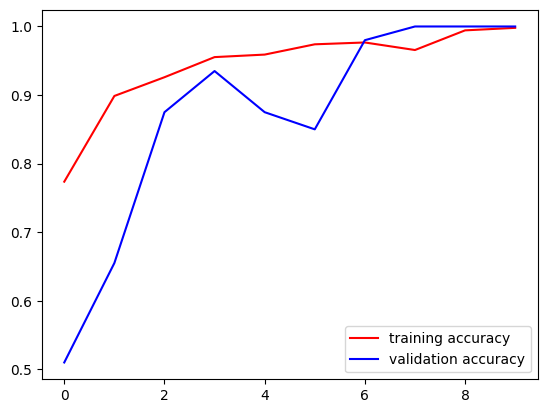

In [13]:
# graph of training_accuracy v/s testing_accuracy
#!pip install matplotlib
import matplotlib.pyplot as plt 

plt.plot(history.history["accuracy"],color="red",label="training accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="validation accuracy")
plt.legend()
plt.show()

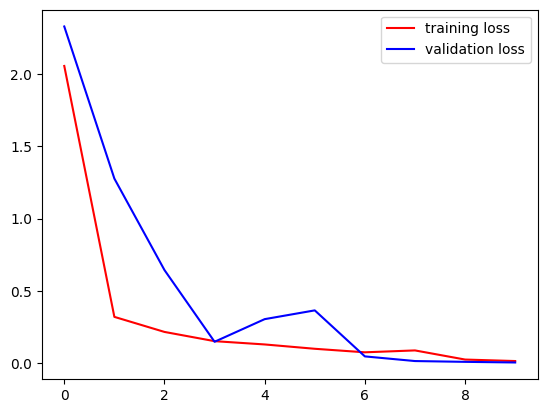

In [14]:
# graph of training_loss v/s testing_loss

plt.plot(history.history["loss"],color="red",label="training loss")
plt.plot(history.history["val_loss"],color="blue",label="validation loss")
plt.legend()
plt.show()


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 38.8/38.8 MB 3.6 MB/s eta 0:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


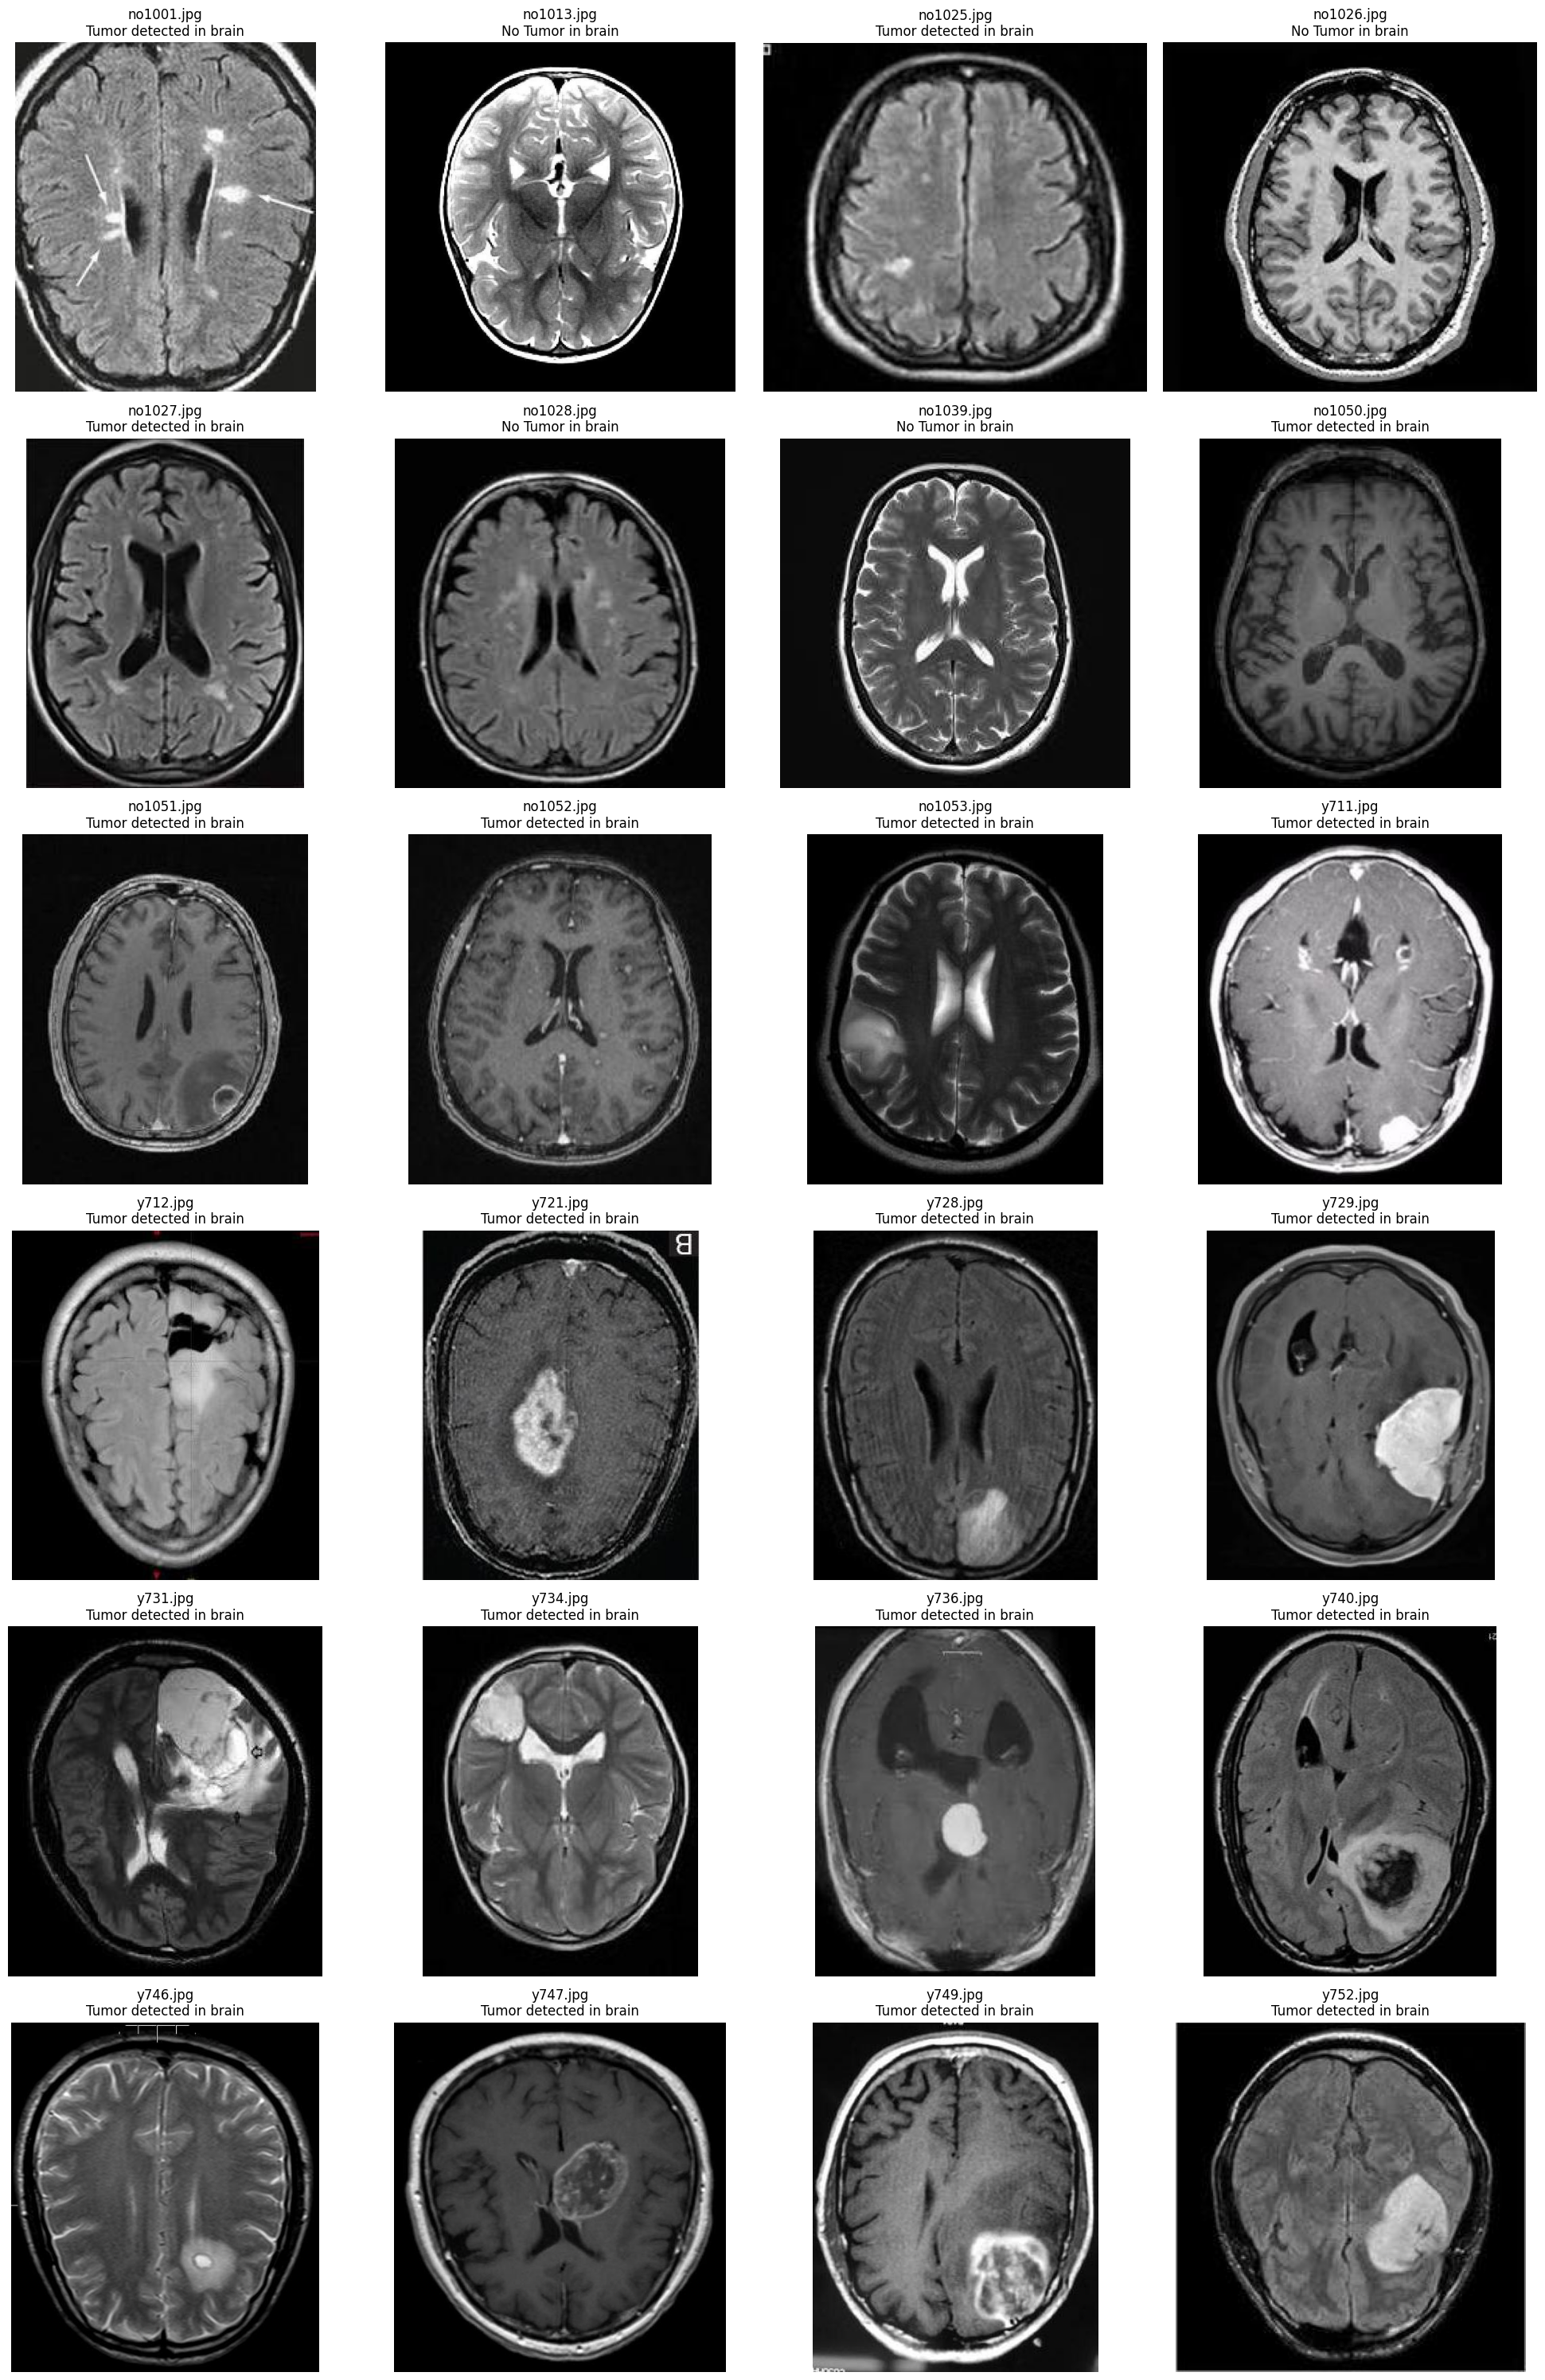

In [16]:
!pip install opencv-python

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def img_processing(image_path, model):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path '{image_path}'")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (256, 256))
    test_input = image_resized.reshape((1, 256, 256, 3))
    
    prediction = model.predict(test_input)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Map the index to the class name
    class_names = ["Tumor detected in brain", "No Tumor in brain"]
    predicted_class = class_names[predicted_class_index[0]]
    return image, predicted_class

def test_on_folder(folder_path, model):
    images = []
    predictions = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            result = img_processing(image_path, model)
            if result is not None:
                image, prediction = result
                images.append(image)
                predictions.append((filename, prediction))
    return images, predictions

def display_images(images, predictions, columns=4):
    rows = (len(images) + columns - 1) // columns
    plt.figure(figsize=(20, 5 * rows))
    for i, (image, (filename, prediction)) in enumerate(zip(images, predictions)):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)
        plt.title(f"{filename}\n{prediction}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 'model' is your pre-trained model
test_folder_path = "./Dataset/test/testing_images"
images, predictions = test_on_folder(test_folder_path, model)
display_images(images, predictions)


In [15]:
#!pip install joblib
#import joblib

#joblib.dump(model,"brain_tumor_detection_model")

   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   -------------- ------------------------- 112.6/301.8 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 3.1 MB/s eta 0:00:00


['brain_tumor_detection_model']

In [ ]:
#import joblib

#model = joblib.load("brain_tumor_detection_model")